# Garbage Detection Model with YOLO

## Preparing the Dataset

garbage-dataset/
├── augmented_images/
│   ├── biological_001.jpeg
│   ├── biological_002.jpeg
│   ├── biological_003.jpeg
│   ├── biological_004.jpeg
│   └── ...
└── augmented_labels/
    ├── biological_001.txt
    ├── biological_002.txt
    ├── biological_003.txt
    ├── biological_004.txt
    └── ...

In [1]:
# Install scikit
!pip install scikit-learn

## Split dataset into train, val and test sets

In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define paths to your original dataset
image_dir = 'garbage-dataset/augmented_images/'
label_dir = 'garbage-dataset/augmented_labels/'

# Define paths to your new train, val, and test directories
train_image_dir = 'garbage-dataset/train/images/'
val_image_dir = 'garbage-dataset/val/images/'
test_image_dir = 'garbage-dataset/test/images/'

train_label_dir = 'garbage-dataset/train/labels/'
val_label_dir = 'garbage-dataset/val/labels/'
test_label_dir = 'garbage-dataset/test/labels/'

# Create train, val, and test directories if they don't exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)

os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Get list of image files (ensure both image and label have same filename)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg', '.png'))]
label_files = [f.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt') for f in image_files]

# Ensure that each image has a corresponding label file
assert all(os.path.exists(os.path.join(label_dir, label)) for label in label_files), "Some label files are missing!"

# Split the dataset into 70% train and 30% (val + test)
train_images, temp_images = train_test_split(image_files, test_size=0.3, random_state=42)

# Split the 30% into 20% validation and 10% test
val_images, test_images = train_test_split(temp_images, test_size=1/3, random_state=42)

# Move the files to respective directories
for img_file in train_images:
    shutil.move(os.path.join(image_dir, img_file), os.path.join(train_image_dir, img_file))
    shutil.move(os.path.join(label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')),
                os.path.join(train_label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')))

for img_file in val_images:
    shutil.move(os.path.join(image_dir, img_file), os.path.join(val_image_dir, img_file))
    shutil.move(os.path.join(label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')),
                os.path.join(val_label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')))

for img_file in test_images:
    shutil.move(os.path.join(image_dir, img_file), os.path.join(test_image_dir, img_file))
    shutil.move(os.path.join(label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')),
                os.path.join(test_label_dir, img_file.replace('.jpeg', '.txt').replace('.jpg', '.txt').replace('.png', '.txt')))

print("Dataset split complete! Train: 70%, Val: 20%, Test: 10%")

Dataset split complete! Train: 70%, Val: 20%, Test: 10%


In [ ]:
!pip install ultralytics

In [ ]:
data_yaml = """
path: garbage-dataset/
train: train/images
val: val/images
test: test/images

nc: 7
names:
  0: 'biological'
  1: 'cardboard'
  2: 'glass'
  3: 'metal'
  4: 'paper'
  5: 'plastic'
  6: 'trash'
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

## Start Training

In [ ]:
!yolo detect train data=data.yaml model=yolo11n.pt epochs=50 imgsz=640

## Running Inference

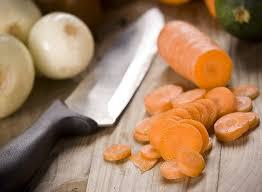

In [3]:
from IPython.display import Image

# Display the original image before running inference
Image(filename='garbage-dataset/test/images/aug_0_biological_016.jpg')

In [1]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=garbage-dataset/test/images/aug_0_biological_016.jpg

Ultralytics 8.3.199  Python-3.9.23 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 C:\Users\Abuelgasim\Downloads\Workshop\garbage-project\garbage-dataset\test\images\aug_0_biological_016.jpg: 480x640 4 biologicals, 107.9ms
Speed: 4.3ms preprocess, 107.9ms inference, 92.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to C:\Users\Abuelgasim\Downloads\Workshop\garbage-project\runs\detect\predict
 Learn more at https://docs.ultralytics.com/modes/predict


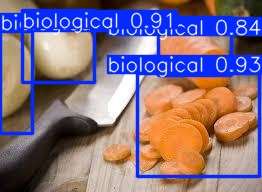

In [4]:
Image(filename='runs/detect/predict/aug_0_biological_016.jpg')